# Load libraries

In [1]:
import numpy as np
import pandas as pd
import os
import re

from datetime import datetime

# Specify git executable file for GitPython in Jupyter Notebook (In IDE, it can still work without this line.)
os.environ["GIT_PYTHON_GIT_EXECUTABLE"] = "C:\Program Files\Git\cmd\git.exe"

import git
from git import RemoteProgress

from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clone repo from GitHub

Link: https://git-scm.com/docs/git-clone <br>
<b>Note:</b> In case too-long file path issue occurs in Windows, set <code>git config --system core.longpaths true</code>

In [2]:
class Progress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [3]:
class Developers:
    developer = []

In [4]:
#remote_link = "https://github.com/spring-projects/spring-data-commons"
local_link = "spring-data-commons"
# Uncomment to clone
# Repo.clone_from(remote_link, local_link, progress=Progress())

In [5]:
repo = Repo(local_link)
fixing_commit = "371f6590c509c72f8e600f3d05e110941607fba"
affected_file = {"src/main/java/org/springframework/data/mapping/PropertyPath.java",
                "src/test/java/org/springframework/data/mapping/PropertyPathUnitTests.java"}

# A. Show Message and Title of Fixing Commit
Link: https://git-scm.com/docs/git-show
You can explore different parameters.

In [6]:
show_data = repo.git.show("-s", fixing_commit).splitlines()
for line in show_data:
    print(line)

commit 371f6590c509c72f8e600f3d05e110941607fbad
Author: Oliver Gierke <ogierke@pivotal.io>
Date:   Tue Apr 3 19:01:15 2018 +0200

    DATACMNS-1285 - PropertyPath now limits the depth of its parsing to 1000 segments.


# B. Show Total files affected in fixing commit

In [8]:
show_total_files = repo.git.show("--pretty=""","--stat", fixing_commit)
print(show_total_files)

 .../springframework/data/mapping/PropertyPath.java |  6 +++++
 .../data/mapping/PropertyPathUnitTests.java        | 30 +++++++++++++++++++++-
 2 files changed, 35 insertions(+), 1 deletion(-)


# C. Show Total directories affected in fixing commit

In [9]:
show_total_dir = repo.git.show("--dirstat", fixing_commit)
print(show_total_dir)

commit 371f6590c509c72f8e600f3d05e110941607fbad
Author: Oliver Gierke <ogierke@pivotal.io>
Date:   Tue Apr 3 19:01:15 2018 +0200

    DATACMNS-1285 - PropertyPath now limits the depth of its parsing to 1000 segments.

  32.9% src/main/java/org/springframework/data/mapping/
  67.0% src/test/java/org/springframework/data/mapping/


# D. Total lines of code deleted (Including comments and blank lines)

In [10]:
show_total_lines_deleted = repo.git.show("--shortstat", fixing_commit).splitlines()
show_total_lines_deleted.reverse()
show_total_lines_deleted = show_total_lines_deleted[0].split(",")
show_total_lines_deleted = show_total_lines_deleted[2].split(" ")
print("Total lines of code deleted <Including comments and blank lines> = "+show_total_lines_deleted[1])

Total lines of code deleted <Including comments and blank lines> = 1


# E. Total lines of code added (Including comments and blank lines)

In [11]:
show_total_lines_added = repo.git.show("--shortstat", fixing_commit).splitlines()
show_total_lines_added.reverse()
show_total_lines_added = show_total_lines_added[0].split(",")
show_total_lines_added = show_total_lines_added[1].split(" ")
print("Total lines of code Added <Including comments and blank lines> = "+show_total_lines_added[1])

Total lines of code Added <Including comments and blank lines> = 35


# F. Total lines of code deleted (Excluding comments and blank lines)

In [12]:
show_total_lines_del = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
#print(show_total_lines_del)
temp_line = []
t_l_del = 0
for line in show_total_lines_del:
    if re.search("^-",line):
        l = line.split(" ")
        if(len(l) > 1):
            if(len(l[0]) == 1):
                if(l[1][:1] != '*' and l[1][:1] != '/'):
                    print(line)
                    t_l_del += 1
                    
print("Total Lines Deleted <Excluding comments and blank lines> = "+ str(t_l_del))

Total Lines Deleted <Excluding comments and blank lines> = 0


# G. Total lines of code added (Excluding comments and blank lines)

In [39]:
show_total_lines_add = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
#print(show_total_lines_add)
temp_line_add = []
t_l_add = 0
for line in show_total_lines_add:
    #check for + symbol in beginning of line
    if re.search("^\+",line):
        line = line.replace("\t", " ")
        l = line.split(" ")
        #If length is less than 1 it is blank line
        if(len(l) > 1):
            #Avoids lines like +++ 
            if(len(l[0]) == 1):
                #Checks for comments in the line
                if(l[1][:1] != '*' and l[1][:2] != "//"):
                    print(line)
                    t_l_add += 1
                    
print("Total Lines Added <Excluding comments and blank lines> = "+ str(t_l_add))

+ private static final String PARSE_DEPTH_EXCEEDED = "Trying to parse a path with depth greater than 1000! This has been disabled for security reasons to prevent parsing overflows.";
+  if (base.size() > 1000) {
+   throw new IllegalArgumentException(PARSE_DEPTH_EXCEEDED);
+  }
+ @Test // DATACMNS-1285
+ public void rejectsTooLongPath() {
+  String source = "foo.bar";
+  for (int i = 0; i < 9; i++) {
+   source = source + "." + source;
+  }
+  assertThat(source.split("\\.").length, is(greaterThan(1000)));
+  final String path = source;
+  exception.expect(IllegalArgumentException.class);
+  PropertyPath.from(path, Left.class);
+ }
+ private class Left {
+  Right foo;
+ }
+ private class Right {
+  Left bar;
+ }
Total Lines Added <Excluding comments and blank lines> = 21


# H. Number of Days between current fixing commit and the previous commit of each affected file

In [41]:
fileNum = 1
for af in affected_file:
    no_of_days = repo.git.log("-2","--pretty=fuller","--format=%cd", fixing_commit,"--",af).splitlines()
    #print(no_of_days)
    date1 = datetime.strptime(no_of_days[0],'%a %b %d %X %Y %z')
    print(date1)
    date2 = datetime.strptime(no_of_days[1],'%a %b %d %X %Y %z')
    print(date2)
    diffDate = abs((date1-date2).days)
    print("File "+str(fileNum)+ " = "+ af)
    print("No of Days = "+ str(diffDate))
    fileNum+=1

2018-04-03 19:30:21+02:00
2016-01-12 08:39:44+01:00
File 1 = src/main/java/org/springframework/data/mapping/PropertyPath.java
No of Days = 812
2018-04-03 19:30:21+02:00
2017-01-13 08:45:25+01:00
File 2 = src/test/java/org/springframework/data/mapping/PropertyPathUnitTests.java
No of Days = 445


# I. Times the affected file of fixing commit modified in the past since their creation

In [42]:
fileNum = 1
for af in affected_file:
    times_file_modified = repo.git.log("--follow","--format=%h", fixing_commit,"--",af).splitlines()
    print("File "+str(fileNum)+ " = "+ af)
    print("No of times Modified = "+str(len(times_file_modified)))
    fileNum+=1

File 1 = src/main/java/org/springframework/data/mapping/PropertyPath.java
No of times Modified = 26
File 2 = src/test/java/org/springframework/data/mapping/PropertyPathUnitTests.java
No of times Modified = 18


# J. Developers modified each affected file since its creation

In [44]:
fileNum = 1
developers=set()
for af in affected_file:
    developersList = repo.git.log("--follow","--format=%an", fixing_commit,"--",af).splitlines()
    #print(developersList)
    dSet = set(developersList)
    developers.update(dSet)
    print("File "+str(fileNum)+ " = "+ af)
    print(dSet)
    fileNum+=1
print(developers)
print(len(developers))

File 1 = src/main/java/org/springframework/data/mapping/PropertyPath.java
{'Oliver Gierke', 'Aleksander Blomskøld', 'Jon Brisbin'}
File 2 = src/test/java/org/springframework/data/mapping/PropertyPathUnitTests.java
{'Oliver Gierke', 'Mark Paluch', 'Jon Brisbin'}
{'Jon Brisbin', 'Mark Paluch', 'Oliver Gierke', 'Aleksander Blomskøld'}
4


# K. Commits performed by developers

In [45]:
commit_authors = repo.git.shortlog("-sn", "--all").splitlines()
author_commits = []
authors = []
for commit_author in commit_authors:
    commit, author = commit_author.split("\t")
    for d in developers:
        if(d == author):
            author_commits.append([int(commit), author])

In [46]:
df = pd.DataFrame(author_commits, columns=['Commit', 'Author'])

In [47]:
df.head()

,Commit,Author
0,1961,Oliver Gierke
1,618,Mark Paluch
2,10,Jon Brisbin
3,1,Aleksander Blomskøld


## Developers commit

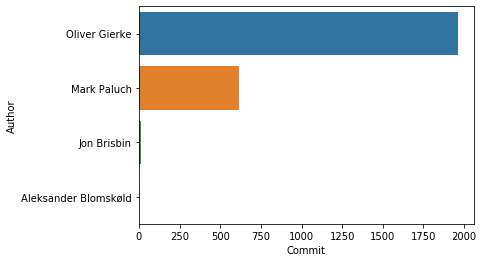

In [48]:
sns.barplot(y='Author', x="Commit", data=df[:len(developers)])